# NOTE:

### This notebook is based on the events from all of the "02" event files

### The data were re-calibrated using the "v05" GAIN files.

### However, they also use the v04 CLC files (the current ones in the CALDB).

### This is the same base as was used to produce the v07 gain files in July 2016
- These only allowed the SLOPE to vary and kept the OFFSET fixed at 0.


- The purpose here is to see if we can discern any gain trends over time.


In [12]:
from matplotlib import pyplot as plt
import matplotlib
import numpy as np

%matplotlib inline
import astropy.units as u

gain_met = 159663600. # from CALDB file
launch_met=77241600. # 2012-06-13T00:00:00

last_cal_year = ( (gain_met - launch_met)*u.s).to(u.yr)
print(last_cal_year)

font = {'family' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)

2.611795573807894 yr


In [13]:
def parse_line(infile, line_ind = 1):
    print(infile)
    line_cent = []
    lowerr = []
    higherr = []
    f = open(infile)
    for line in f:
        if len(line) == 0:
                continue
        fields = line.split()
        if len(fields) == 0:
            continue

        field_id = 0
        line_cent = np.append(line_cent, float(fields[line_ind*3 + 0]))
        lowerr = np.append(lowerr, float(fields[line_ind*3]) - float(fields[line_ind*3 + 1]) )
        higherr = np.append(higherr, float(fields[line_ind*3 + 2]) - float(fields[line_ind*3]))
    return line_cent, lowerr, higherr


fpmb_det0_lines_repro_epochs.txt
[ 105.4    105.425  105.327  105.235  105.163  105.116  105.011  104.984
  105.048  104.963  104.988  104.84   104.809  104.937  104.816  104.829
  104.707  104.707  104.64   104.733  104.704  104.684  104.599  104.649
  104.632  104.521  104.499  104.433]
fpmb_det1_lines_repro_epochs.txt
[ 105.441  105.406  105.31   105.226  105.137  105.105  105.009  104.981
  104.988  104.976  104.979  104.884  104.763  104.917  104.816  104.855
  104.68   104.694  104.635  104.709  104.645  104.691  104.585  104.666
  104.596  104.52   104.482  104.432]
fpmb_det2_lines_repro_epochs.txt
[ 105.305  105.206  105.096  105.035  104.937  104.859  104.789  104.762
  104.82   104.73   104.714  104.655  104.582  104.697  104.595  104.577
  104.44   104.494  104.416  104.5    104.467  104.436  104.373  104.383
  104.391  104.283  104.293  104.242]
fpmb_det3_lines_repro_epochs.txt
[ 105.28   105.339  105.248  105.159  105.104  105.035  104.945  104.918
  104.977  104.923  104.

/Users/bwgref/science/local/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


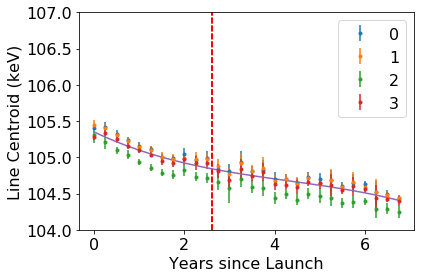

105.4 keV @ 0.2% per year: 0.21080000000000002
1.00046896648


In [14]:
mod = 'fpmb'
for det in range(4):
    infile = '{}_det{}_lines_repro_epochs.txt'.format(mod, det)
    line_cent, lowerr, higherr = parse_line(infile, line_ind = 2)
    plt.errorbar(0.25*np.arange(len(line_cent)), line_cent, lowerr, fmt='.', label='{}'.format(det))
    plt.legend()
    plt.xlabel('Years since Launch')
    plt.ylabel('Line Centroid (keV)')
    plt.axvline(x=last_cal_year.value, color = 'r', linestyle='--')
    print(line_cent)

time= 0.25*np.arange(len(line_cent))
pars = np.polyfit(time, line_cent, 3)
polyfit = np.poly1d(pars)
print(pars)
plt.plot(time, polyfit(time))
plt.ylim(104, 107)
plt.show()
scaled_pars = pars / pars[3]

print('105.4 keV @ 0.2% per year: {}'.format(0.002*105.4))

print(polyfit(0) / 105.3)
#print('144.6 keV @ 0.2% per year: {}'.format(0.002*144.6))

fpmb_det0_lines_repro_epochs.txt
fpmb_det1_lines_repro_epochs.txt
fpmb_det2_lines_repro_epochs.txt
fpmb_det3_lines_repro_epochs.txt


/Users/bwgref/science/local/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


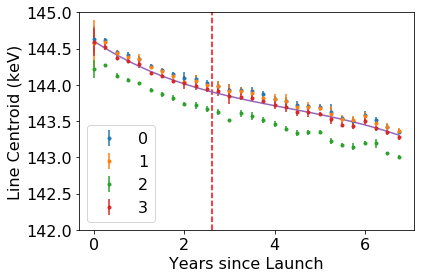

[ -5.20381084e-03   6.69870428e-02  -4.06567551e-01   1.44600000e+02]


In [17]:
mod = 'fpmb'
for det in range(4):
    infile = '{}_det{}_lines_repro_epochs.txt'.format(mod, det)
    line_cent, lowerr, higherr = parse_line(infile, line_ind = 0)
    plt.errorbar(0.25*np.arange(len(line_cent)), line_cent, lowerr, fmt='.', label='{}'.format(det))
plt.legend()
plt.xlabel('Years since Launch')
plt.ylabel('Line Centroid (keV)')
plt.axvline(x=last_cal_year.value, color = 'r', linestyle='--')
pars145 = 144.6 * scaled_pars
polyfit145 = np.poly1d(pars145)

plt.plot(time, polyfit145(time))
plt.ylim([142, 145])
plt.show()

print(pars145)


fpmb_det0_lines_repro_epochs.txt
fpmb_det1_lines_repro_epochs.txt
fpmb_det2_lines_repro_epochs.txt
fpmb_det3_lines_repro_epochs.txt


/Users/bwgref/science/local/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


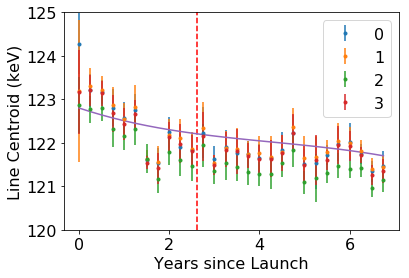

In [18]:
mod = 'fpmb'
for det in range(4):
    infile = '{}_det{}_lines_repro_epochs.txt'.format(mod, det)
    line_cent, lowerr, higherr = parse_line(infile, line_ind = 1)
    plt.errorbar(0.25*np.arange(len(line_cent)), line_cent, lowerr, fmt='.', label='{}'.format(det))
plt.legend()
plt.xlabel('Years since Launch')
plt.ylabel('Line Centroid (keV)')
plt.axvline(x=last_cal_year.value, color = 'r', linestyle='--')
pars122 = 122.8*scaled_pars
polyfit122 = np.poly1d(pars122)

plt.ylim(120, 125)
plt.plot(time, polyfit122(time))
plt.show()





In [156]:
print('105.4 keV @ 0.2% per year: {}'.format(0.002*105.4))
print('144.6 keV @ 0.2% per year: {}'.format(0.002*144.6))

105.4 keV @ 0.2% per year: 0.21080000000000002
144.6 keV @ 0.2% per year: 0.2892
